# COGS 108 - Gun Violence in the U.S. Final Project

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

## Link to Final Video

https://youtu.be/TJgv55ZQtrY

# Overview

Our project aims to explore state-specific factors that influence gun violence in the United States. To comprehend their effect on gun violence, we are concentrating on the link between poverty rates as well as access to mental health care. We attempt to determine the strongest and most statistically significant relationships with gun violence by carefully analyzing these factors.

# Names

- Andrew Phan 
- Aditya Kumar
- Dalila Solis
- Ricardo Aguilar
- Zach Yuen

<a id='research_question'></a>
# Research Question

Among a comprehensive range of socio-economic factors such as poverty rates and mental health service accessibility, which factors exhibit the strongest and most statistically significant correlations with gun violence in the United States?

<a id='background'></a>

## Background & Prior Work

Gun violence is a serious issue in the United States with significantly higher levels compared to many other developed countries along with many contributing factors. Previous studies have looked at the connections between poverty rates and access to mental health services. Research has also linked poverty to greater rates of violence and crime, especially using firearms. A lack of access to mental health treatments and unrelated mental illnesses have also been linked to an increased likelyhood of engaging in violent acts involving weapons. Understanding how these factors interact can help determine the most efficient methods for reducing gun violence.

One relevant study by John Rozel and Edward Mulvey examined the link between mental illness and firearm violence, highlighting the fact that even though mental illness is a marginal risk factor for violence, untreated or inadequately managed mental health issues might make people more likely to act violently, especially by using guns. In order to reduce violence risk without stigmatizing people with mental illness, evidence-based public policy must be guided by mental health specialists who also educate patients on gun safety [^rozel]. Another study conducted by Nicole Kravitz-Wirtz among several others explored the relationship between deadly gun violence by poverty, finding that the increasing poverty levels in the households of specifically young people can have a negative impact in terms of high exposure to gun violence [^kravitz-wirtz].

Although research has looked at the specific relationships between poverty, mental health, and gun violence, a thorough study that takes many aspects into account is still necessary. By examining how poverty rates, access to mental health services, and other potential variables interact, we seek to close this gap by identifying the variables that have the strongest and most statistically significant correlations with gun violence at the state level in the United States.


[^rozel] Rozel, John S., and Edward P. Mulvey. “The Link between Mental Illness and Firearm Violence: Implications for Social Policy and Clinical Practice.” Annual Review of Clinical**
 
[^kravitz-wirtz] Kravitz-Wirtz, Nicole, et al. “Inequities in Community Exposure to Deadly Gun Violence by Race/Ethnicity, Poverty, and Neighborhood Disadvantage among Youth in Large US Cities.” Journal of Urban Health, 7 June 2022, https://doi.org/10.1007/s11524-022-00656-0.

# Hypothesis


Our group hypothesizes that both high poverty rates and lack of access to mental health will correlatate most positively with gun violence in the U.S. We came to this outcome because areas with high poverty rates might experience limited economic opportunities as well as social disparities such as housing and food instability which we believe leads to acts of violence. Additionally, limited access to mental health services may result in untreated or under-treated mental illnesses, which can raise the risk of individuals using weapons in violent crimes.

# Dataset(s)

* Dataset Name: Mental Health Dataset
* Link to the dataset: https://mhanational.org/issues/2022/mental-health-america-access-care-data
* Number of observations: 408

This dataset provides the rate of access to care and mental health rates by state from 2015 till 2022. A high ranking on this dataset means that citizens of the state have a high access to care and a low mental health rate. 


* Dataset Name: Poverty Rate Dataset
* Link to the dataset: https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-poverty-people.html
* Number of observations: 3162

This dataset provides the number of people and the poverty rate per state for the years 1959 till 2021.


* Dataset Name: Gun Violence Incidents Dataset
* Link to the dataset: https://www.kaggle.com/datasets/greysky/us-gun-violence-dataset
* Number of observations: 452787

This dataset provides the gun violence incidents that have occurred in the United States from January 1, 2014 to September 22, 2022. The data is grouped by state which will allow us to calculate the number of incidents per state within this time frame as well as see the trend in number of incidents through the years. 

We plan to use these datasets in conjunction to compare how each factors affect the number of gun violence incidents. The mental health dataset and the poverty rate dataset will each be compared to the gun violence datasets by state to see the trends between each of these factors and gun violence.

# Setup

In [1]:
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# Data Cleaning

First, we will import the datasets for our analysis before removing any unneeded columns that seem unnecessary or irrelevant to the purposes of this project.

In [2]:
# Create Gun Violence Dataframe and remove unwanted columns
incidentsDF = pd.read_csv("Datasets/incident.csv")
incidentsDF = incidentsDF.drop(columns=['City_Or_County', 'Address', 'Killed', 'Injured', 'Incident_ID'])
incidentsDF = incidentsDF.sort_values(by='State_Code').reset_index(drop=True)

# Create Mental Health Dataframe
healthDF = pd.read_csv("Datasets/MentalHealth.csv")

# Create Poverty Dataframe
povertyDF = pd.read_csv("Datasets/Poverty.csv")
povertyDF = povertyDF.dropna()
povertyDF = povertyDF.rename(columns={'Table with row headers in column A and column headers in rows 5, 58, 111, 164, 217, 270, 323, 376, 429, 482, 535, 588, 641, 694, 747, 800, 853, 906, 959, 1012, 1065, 1118, 1171, 1224, 1277, 1330, 1383, 1436, 1489, 1542, 1595, 1648, 1701, 1754, 1807, 1860, 1913, 1966, 2019, 2072, 2125, 2178, 2231, and 2284': 'State', 'Unnamed: 1': 'Total population', 'Unnamed: 2': 'Number in poverty', 'Unnamed: 4': 'Percent in poverty'})
povertyDF = povertyDF.drop(index=3, columns={'Unnamed: 3', 'Unnamed: 5'})
povertyDF = povertyDF[povertyDF['State'] != 'State']
povertyDF = povertyDF.reset_index(drop=True)

Next, in order to improve the readability and interpretability of the data for upcoming analysis, we will perform the task of renaming the "State" column in the incidentsDF dataframe by swapping out the current state codes with the full names of the corresponding states.

In [3]:
incidentsDF = incidentsDF.rename(columns={'State_Code': 'State'})

# Rename from state codes to full state name
incidentsDF['State'] = incidentsDF['State'].replace('AK', 'Alaska')
incidentsDF['State'] = incidentsDF['State'].replace('AL', 'Alabama')
incidentsDF['State'] = incidentsDF['State'].replace('AZ', 'Arizona')
incidentsDF['State'] = incidentsDF['State'].replace('AR', 'Arkansas')
incidentsDF['State'] = incidentsDF['State'].replace('CA', 'California')
incidentsDF['State'] = incidentsDF['State'].replace('CO', 'Colorado')
incidentsDF['State'] = incidentsDF['State'].replace('CT', 'Connecticut')
incidentsDF['State'] = incidentsDF['State'].replace('DE', 'Delaware')
incidentsDF['State'] = incidentsDF['State'].replace('DC', 'District of Columbia')
incidentsDF['State'] = incidentsDF['State'].replace('FL', 'Florida')
incidentsDF['State'] = incidentsDF['State'].replace('GA', 'Georgia')
incidentsDF['State'] = incidentsDF['State'].replace('HI', 'Hawaii')
incidentsDF['State'] = incidentsDF['State'].replace('ID', 'Idaho')
incidentsDF['State'] = incidentsDF['State'].replace('IL', 'Illinois')
incidentsDF['State'] = incidentsDF['State'].replace('IA', 'Iowa')
incidentsDF['State'] = incidentsDF['State'].replace('IN', 'Indiana')
incidentsDF['State'] = incidentsDF['State'].replace('KS', 'Kansas')
incidentsDF['State'] = incidentsDF['State'].replace('KY', 'Kentucky')
incidentsDF['State'] = incidentsDF['State'].replace('LA', 'Louisiana')
incidentsDF['State'] = incidentsDF['State'].replace('ME', 'Maine')
incidentsDF['State'] = incidentsDF['State'].replace('MD', 'Maryland')
incidentsDF['State'] = incidentsDF['State'].replace('MA', 'Massachusetts')
incidentsDF['State'] = incidentsDF['State'].replace('MI', 'Michigan')
incidentsDF['State'] = incidentsDF['State'].replace('MN', 'Minnesota')
incidentsDF['State'] = incidentsDF['State'].replace('MS', 'Mississippi')
incidentsDF['State'] = incidentsDF['State'].replace('MO', 'Missouri')
incidentsDF['State'] = incidentsDF['State'].replace('MT', 'Montana')
incidentsDF['State'] = incidentsDF['State'].replace('NE', 'Nebraska')
incidentsDF['State'] = incidentsDF['State'].replace('NV', 'Nevada')
incidentsDF['State'] = incidentsDF['State'].replace('NH', 'New Hampshire')
incidentsDF['State'] = incidentsDF['State'].replace('NJ', 'New Jersey')
incidentsDF['State'] = incidentsDF['State'].replace('NM', 'New Mexico')
incidentsDF['State'] = incidentsDF['State'].replace('NY', 'New York')
incidentsDF['State'] = incidentsDF['State'].replace('NC', 'North Carolina')
incidentsDF['State'] = incidentsDF['State'].replace('ND', 'North Dakota')
incidentsDF['State'] = incidentsDF['State'].replace('OH', 'Ohio')
incidentsDF['State'] = incidentsDF['State'].replace('OK', 'Oklahoma')
incidentsDF['State'] = incidentsDF['State'].replace('OR', 'Oregon')
incidentsDF['State'] = incidentsDF['State'].replace('PA', 'Pennsylvania')
incidentsDF['State'] = incidentsDF['State'].replace('RI', 'Rhode Island')
incidentsDF['State'] = incidentsDF['State'].replace('SC', 'South Carolina')
incidentsDF['State'] = incidentsDF['State'].replace('SD', 'South Dakota')
incidentsDF['State'] = incidentsDF['State'].replace('TN', 'Tennessee')
incidentsDF['State'] = incidentsDF['State'].replace('TX', 'Texas')
incidentsDF['State'] = incidentsDF['State'].replace('UT', 'Utah')
incidentsDF['State'] = incidentsDF['State'].replace('VT', 'Vermont')
incidentsDF['State'] = incidentsDF['State'].replace('VA', 'Virginia')
incidentsDF['State'] = incidentsDF['State'].replace('WA', 'Washington')
incidentsDF['State'] = incidentsDF['State'].replace('WV', 'West Virginia')
incidentsDF['State'] = incidentsDF['State'].replace('WI', 'Wisconsin')
incidentsDF['State'] = incidentsDF['State'].replace('WY', 'Wyoming')

Now, we will begin the process of locating and deleting any duplicate entries of years within the poverty dataset. This is to ensure the accuracy and reliability of our project.

In [4]:
povertyDF = povertyDF.drop(index=range(255,306))
povertyDF = povertyDF.reset_index(drop=True)
povertyDF = povertyDF.drop(index=range(255,306))
povertyDF = povertyDF.reset_index(drop=True)

Finally, we will take on the task of adding a new column with the name "Year" to the povertyDF dataframe as an essential part of our data process. This column will serve as a crucial component for organizing and contextualizing the data based on the corresponding years of the observations.

In [5]:
year = 2021
for i in range(len(povertyDF)):
    if povertyDF.at[i, 'State'] == "Alabama" and i != 0:
        year -= 1
    povertyDF.at[i, 'Year'] = year
povertyDF = povertyDF.astype({'Year': int})
povertyDF = povertyDF.dropna()
povertyDF = povertyDF.reset_index(drop=True)
povertyDF['Percent in poverty'] = pd.to_numeric(povertyDF['Percent in poverty'])
povertyDF['Total population'] = povertyDF['Total population'].str.replace(',', '').astype(int) * 1000

# Data Analysis & Results

In this section, we will anaylze the time related trends related to gun violence incidents in the United States. Below we will plot the number of gun violence incidents specifically by years.

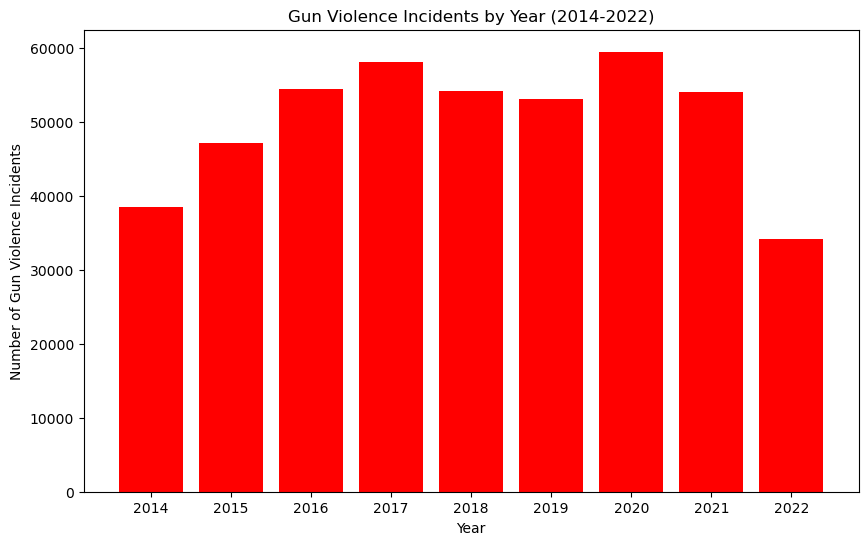

In [6]:
# Filter data for the years (2014-2022)
start_year = '2014'
end_year = '2022'
incidents_by_year = incidentsDF[(incidentsDF['Incident_Date'].str[:4] >= start_year) & (incidentsDF['Incident_Date'].str[:4] <= end_year)]

# Extract the year from the incident dates
incidents_by_year['Year'] = incidents_by_year['Incident_Date'].str[:4]

# Count the number of incidents for each year
incident_counts = incidents_by_year['Year'].value_counts().sort_index()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(incident_counts.index, incident_counts.values, color='red')
plt.xlabel('Year')
plt.ylabel('Number of Gun Violence Incidents')
plt.title('Gun Violence Incidents by Year (2014-2022)')
plt.show()

From the histogram above, we can clearly see the distribution of gun violence incidents across the years 2014 to 2022 which are steadily increasing every year. It is evident that the year 2022 has as a significant drop in the number of gun violence incidents.

In this next section, we will anaylze the correlation between each state's mental health rank (a higher ranking, closer to 1, indicates lower prevalence of mental illness and higher rates of access to care) and the number of gun violence incidents it encountered. We will do so by plotting a state's rank compared to its number of incidents for years 2015-2022.

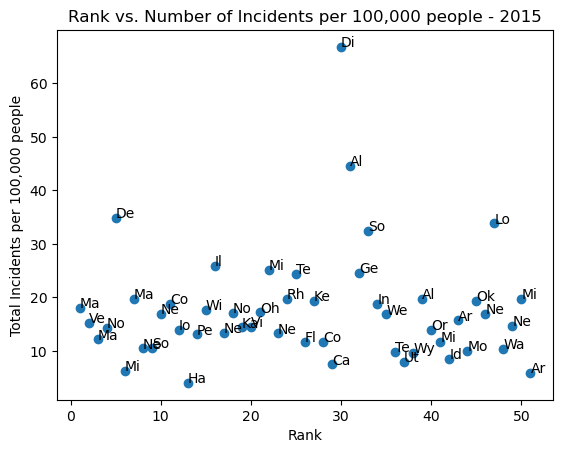

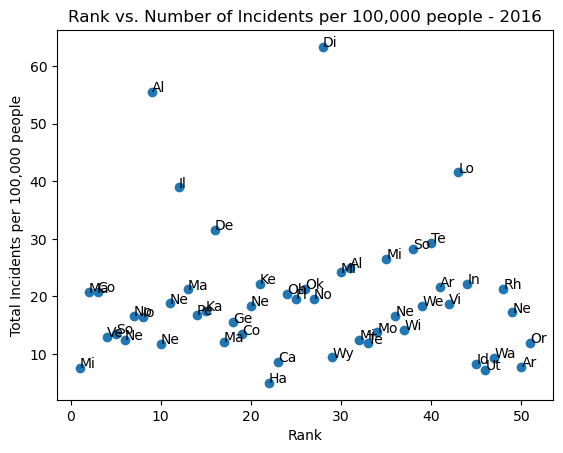

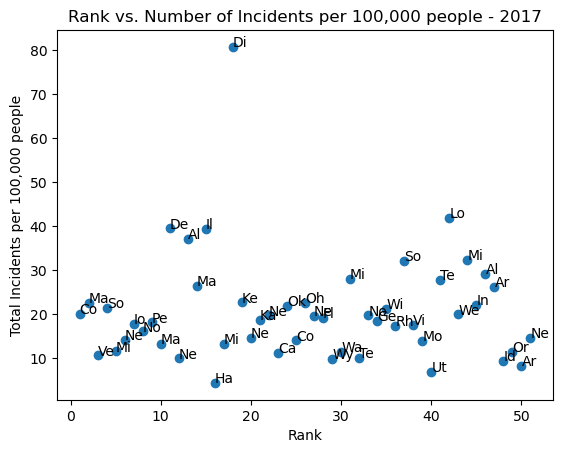

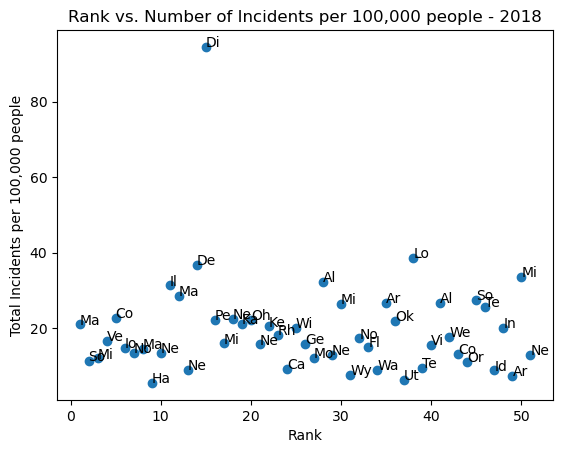

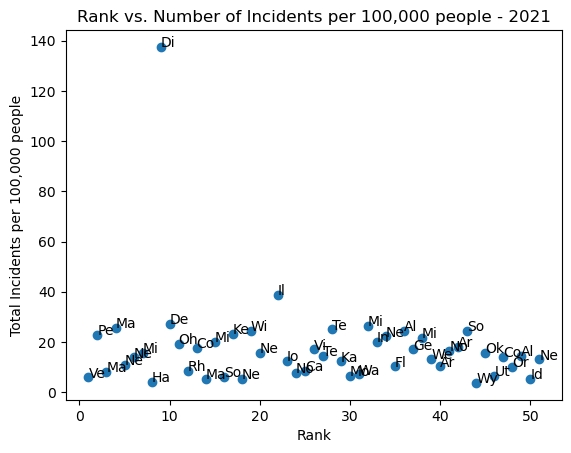

In [7]:
# Create Mental Health Dataframe
mentalDF = pd.read_csv("Datasets/MentalHealth.csv")

# Converting Incident_Date column to datetime type and extracting the year
incidentsDF['Incident_Date'] = pd.to_datetime(incidentsDF['Incident_Date'])
incidentsDF['Year'] = incidentsDF['Incident_Date'].dt.year

# Grouping incidentsDF by Year and State and counting the occurrences
totalIncidentsDF = incidentsDF.groupby(['Year', 'State']).size().reset_index(name='Total_Incidents')

# Removing rows with the year 2014, 2019, 2020, 2022 since there's incomplete mental health data from those years
totalIncidentsDF = totalIncidentsDF[totalIncidentsDF['Year'] != 2014]
totalIncidentsDF = totalIncidentsDF[totalIncidentsDF['Year'] != 2019]
totalIncidentsDF = totalIncidentsDF[totalIncidentsDF['Year'] != 2020]
totalIncidentsDF = totalIncidentsDF[totalIncidentsDF['Year'] != 2022]

# Plotting scatterplots
years = totalIncidentsDF['Year'].unique()
for year in years:
    data_year = totalIncidentsDF[totalIncidentsDF['Year'] == year]
    merged_df = pd.merge(data_year, povertyDF, on=['Year', 'State'])
    merged_df = pd.merge(merged_df, mentalDF, on=['Year', 'State'])
    merged_df['Total Incidents per 100,000 people'] = (merged_df['Total_Incidents'] / (merged_df['Total population'])) * 100000
    plt.scatter(merged_df['Rank'], merged_df['Total Incidents per 100,000 people'])
    plt.title(f'Rank vs. Number of Incidents per 100,000 people - {year}')
    plt.xlabel('Rank')
    plt.ylabel('Total Incidents per 100,000 people')
    
    # Labeling the dots with state abbreviations
    for i in range(len(merged_df)):
        state_abbr = merged_df['State'].iloc[i][:2]  # Extract first two characters as abbreviation
        plt.text(merged_df['Rank'].iloc[i], merged_df['Total Incidents per 100,000 people'].iloc[i], state_abbr)
    
    plt.show()

Based on each of these scatterplots, we can see that there isn't any clear correlation between the mental health rank of a state and the number of gun violence incidents it experiences per year. 

In the next section, we will analyze the correlation between the poverty rate in each state and the number of gun violence incidents per 100,000 people. We will do so by plotting a state's poverty rate against the number of incidents per 100,000 people for years 2015-2021.

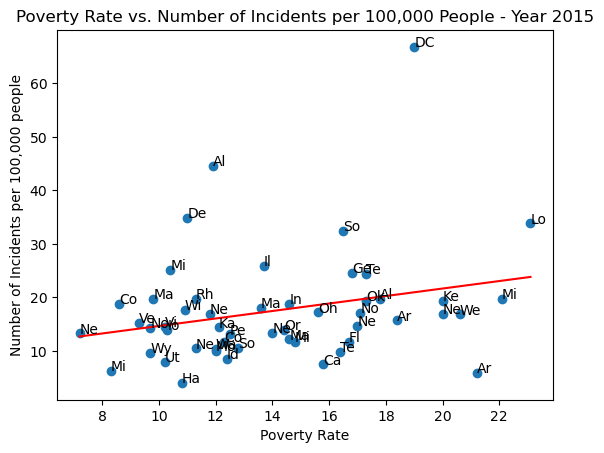

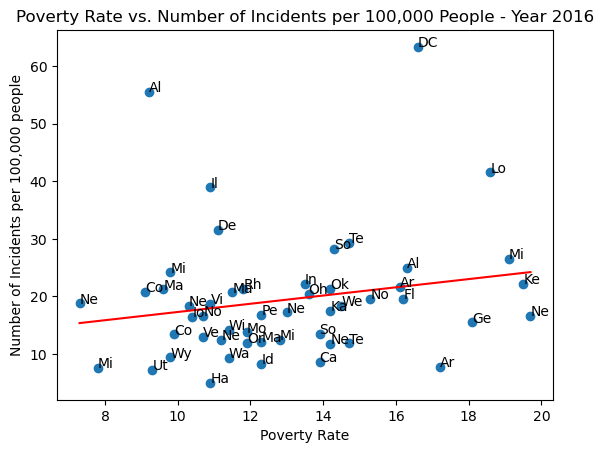

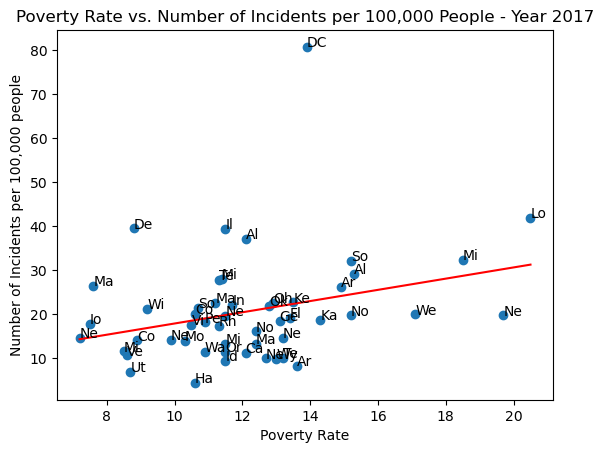

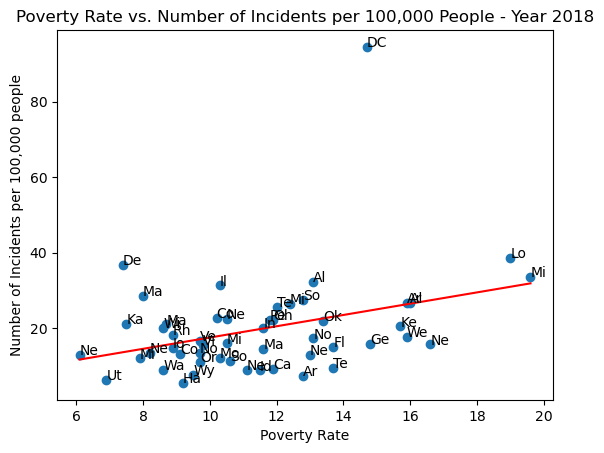

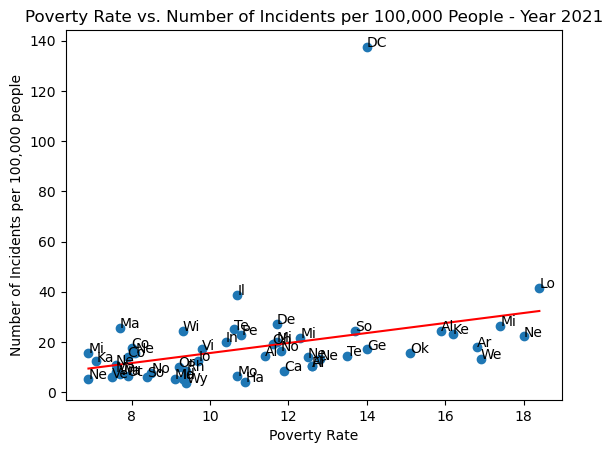

In [8]:
mask = povertyDF['Year'] >= 2015
povertyDF = povertyDF[mask]

mask = totalIncidentsDF['Year'] <= 2021
totalIncidentsDF = totalIncidentsDF[mask]

for year in totalIncidentsDF['Year'].unique():
    data_year = totalIncidentsDF[totalIncidentsDF['Year'] == year]
    merged_df = pd.merge(data_year, povertyDF, on=['Year', 'State'])
    merged_df = merged_df.sort_values('Percent in poverty').reset_index(drop=True)
    merged_df['Total Incidents per 100,000 people'] = (merged_df['Total_Incidents'] / (merged_df['Total population'])) * 100000
#     print(merged_df)
    plt.scatter(merged_df['Percent in poverty'], merged_df['Total Incidents per 100,000 people'])
    plt.title(f'Poverty Rate vs. Number of Incidents per 100,000 People - Year {year}')
    plt.xlabel('Poverty Rate')
    plt.ylabel('Number of Incidents per 100,000 people')

    # Labeling the dots with state abbreviations
    for i in range(len(merged_df)):
        state_abbr = merged_df['State'].iloc[i][:2]  # Extract first two characters as abbreviation
        if state_abbr == 'Di':
            state_abbr = 'DC'
        plt.text(merged_df['Percent in poverty'].iloc[i], merged_df['Total Incidents per 100,000 people'].iloc[i], state_abbr)
    
    slope, intercept = np.polyfit(merged_df['Percent in poverty'], merged_df['Total Incidents per 100,000 people'], 1)
    trendline = slope * merged_df['Percent in poverty'] + intercept
    plt.plot(merged_df['Percent in poverty'], trendline, color='red')
    plt.show()


From the trendlines on each of the scatterplots, we can see that there is a slightly positive correlation between the poverty rate of a state and the number of incidents per 100,000 people in that state. We also see that Washington DC is an extreme with a much higher number of incidents per 100,000 people for the poverty rate. 

# Ethics & Privacy

In terms of ethics and privacy, we are confident that the datasets we used are allowed for public access, meaning no necessary permission is needed. The datasets are from Kaggle, the United States Census Bureau, and Mental Health America which are open source dataset websites. We are also confident that the datasets we used are unbiased and ensure the privacy and confidentiality of individuals involved. In other words, no names are included in the datasets that identify those that are involved in the studies as a whole.

From the datasets involving mental health ranks, we have considered data accuracy and completeness which can vary between states depending on whether ones have more effective data collecting and reporting processes. Therefore, there is potential for biases on specific years where certain states have better or worse data quality, and where some data items are not there or are just partially present.

# Conclusion & Discussion

In our analysis of gun violence incidents in the United States, we examined the time-related trends, correlation between mental health rank and incidents, and correlation between poverty rate and incidents per 100,000 people.

The histogram of incidents by year shows that there were more instances of gun violence from the years 2014 to 2022, with a notable decrease in 2022. This highlights the concern about the growing trend in gun violence events over time and stresses the need for effective solutions and laws to address this issue. Regarding the link between incidents and mental health rank, our scatterplots could not clearly demonstrate a relationship between a state's mental health ranking and the number of gun violence events it experienced. This demonstrates that the generality of mental illness and access to mental health care may not be the only factors contributing to gun violence at the state level.

Thus, our findings provide support for the influence of high poverty rates on gun violence. Limited economic opportunities and social disparities in areas with high poverty rates, along with potential factors like housing and food instability, may contribute to acts of violence. As a result of our study, it appears that gun violence incidents in the United States are positively correlated with high poverty rates. Although mental health status by itself does not seem to be a significant effect, additional research is necessary due to the complex relationship of numerous socioeconomic factors. And so, plans to lower gun violence in the U.S. should include addressing the root causes of poverty.

# Team Contributions

- Andrew Phan: Contributed to the Project Proposal and EDA checkpoint. Also contributed 2 min to the Final Video.
- Aditya Kumar: Contributed to the Project Proposal and wrote up the Data checkpoint. Also constructed scatterplots for the Data Analysis & Results in the EDA checkpoint with trendlines based off of Poverty Rate versus the Number of Incidents per 100,000 people for years 2015-2021. Also contributed 1 min to the Final Video.
- Dalila Solis: Wrote up the Project Proposal and contributed to the Data checkpoint. Also constructed a histogram based off of Gun Violence Incidents by Year (2014-2022) for the Data Analysis & Results in the EDA checkpoint. Also wrote up Final Project and contributed 1 min to the Final Video.
- Ricardo Aguilar: Contributed to the Project Proposal and EDA checkpoint. Also contributed 1 min to the Final Video.
- Zach Yuen: Contributed to the Project Proposal and the Data Checkpoint. Also constructed scatterplots for the Data Analysis & Results in the EDA checkpoint based off of Mental Health Ranks versus the Number of Incidents for years 2015-2022.